## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [40]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('test_06_05_2024.mat')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

print(A.shape)
print((np.count_nonzero(A)/(A.shape[0]*A.shape[1]))*100,"%")
elem = np.sum(np.array(A[0,1:A.shape[0]]))
print(elem < A[0][0]) # ha diagonale strettamente dominante

# controllo simmetrica
print(A.all() == A.T.all())

# controllo se è definita positiva
autovalori = np.linalg.eigvals(A)
print(autovalori.all() > 0)

def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore > toll:
        it=it+1
        Ap= A@p
        alpha = (r.T@r)/((A@r).T@r)
                
        x = x + alpha*p   
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
        
     
    return x,vet_r,vec_sol,it

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = (r.T@r)/((Ap).T@p)
        x = x + alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r + gamma*p
   
    
    return x,vet_r,vec_sol,it

toll=1e-10
maxit=4000
x0 = np.zeros_like(b)

xC,vet_rC,vec_solC,itC = steepestdescent(A,b,x0,maxit,toll)
print("iterazioni gradiente ", itC)
xG,vet_rG,vec_solG,itG = conjugate_gradient(A,b,x0,maxit,toll)
print("iterazioni gradiente coniugato ", itG)

# calcolo la velocità di convergenza

vel_grad = ((np.linalg.cond(A)-1)/(np.linalg.cond(A)+1))*vet_rC[0]
print("velocità del gradiente ", vel_grad)
vel_coniugato = ((np.sqrt(np.linalg.cond(A))-1)/(np.sqrt(np.linalg.cond(A))+1))*vet_rG[0]
print("velocità del coniugato ", vel_coniugato)

(400, 400)
1.2449999999999999 %
True
True
True
iterazioni gradiente  107
iterazioni gradiente coniugato  36
velocità del gradiente  0.8796121538543219
velocità del coniugato  0.5960677546812206


- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

In [46]:
from scipy.linalg import lu
import SolveTriangular

# non serviva
#def gauss(A, b):
#    PT, L, U = lu(A)
#    P = P.T
#    
#    y, flag = SolveTriangular.Lsolve(L, P@b)
#    x, flag = SolveTriangular.Usolve(U, y)
#    
#    return x

A2 = np.array([ [1,2,3,4], [2,-4,6,8], [-1,-2,-3,-1], [5,7,0,1] ])

print(A2.shape) # è quadrata ed è di piccole dimensioni
print(np.count_nonzero(A2)/(A2.shape[0]*A2.shape[1])*100,"%") # è densa
print(np.linalg.cond(A2)) # è ben condizionata < 10^3

    

(4, 4)
93.75 %
8.921283937729623


## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

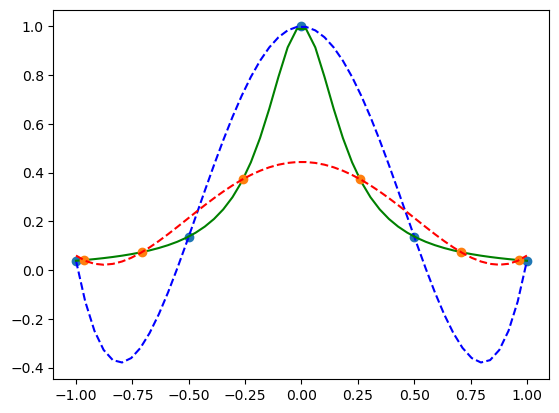

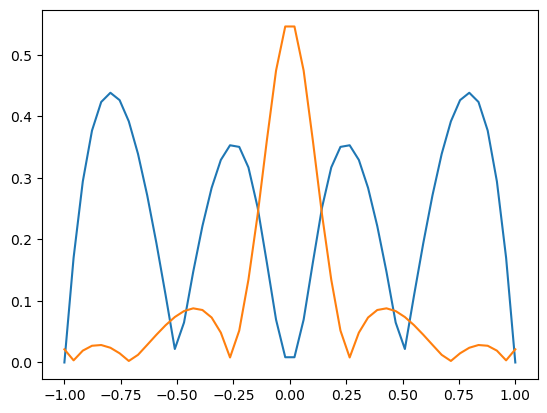

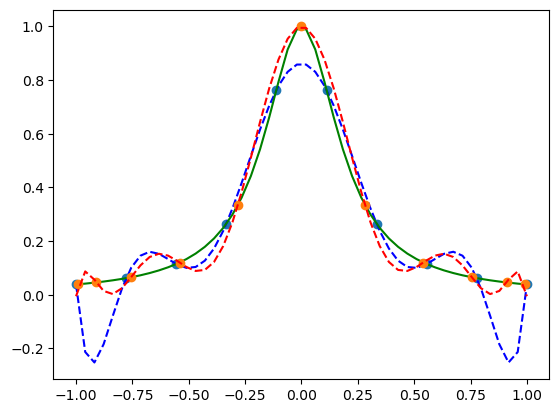

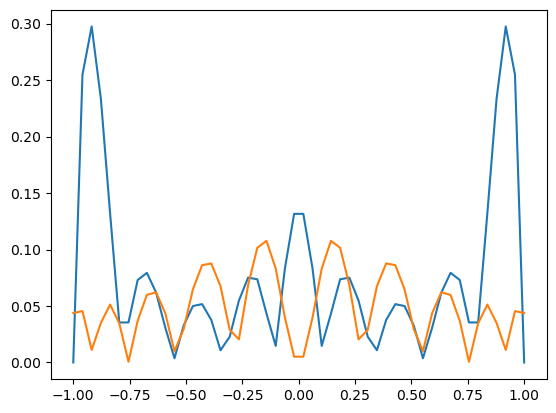

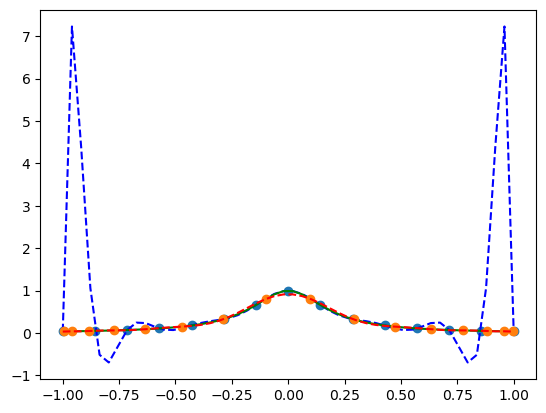

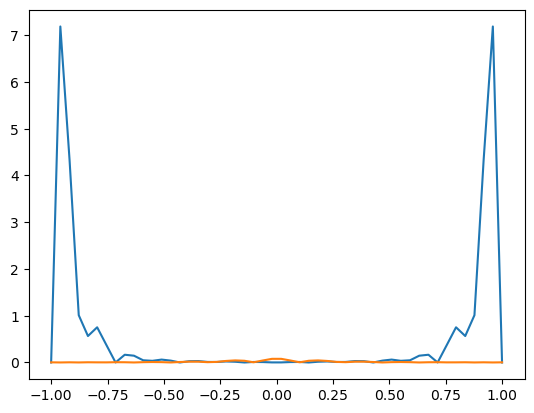

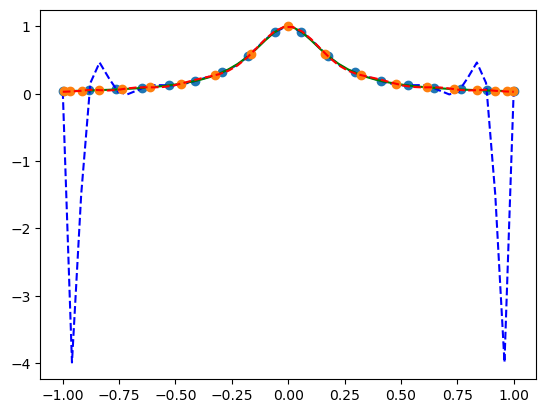

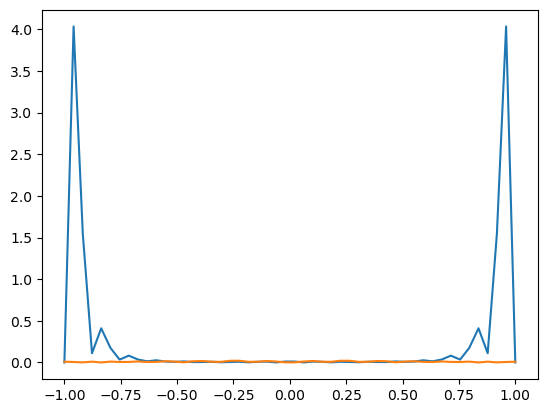

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
        xzeri=xnodi[1:n]
    else:
        xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
    """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
    """
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    return L@y
     
# primo punto
punti_tot = 50
n = np.array([5,10,15,18])
a = -1
b = 1
for n_chosen in n:
    
    #fatto con punti equidistanti
    xi1 = np.linspace(a,b,n_chosen)
    i = np.arange(n_chosen+1)
    
    yi1 = 1/(1+25*xi1**2)
    xxi = np.linspace(a,b,punti_tot)
    fi = 1/(1+25*xxi**2)
    puntiInter=InterpL(xi1,yi1,xxi)
    
    plt.plot(xi1,yi1,'o',xxi,puntiInter,'b--',xxi,fi,'g')
    
    # qui faccio con Chebyshev
    xi2 = ( (a+b)/2) + ((b-a)/2)*np.cos((2*i+1)*np.pi / (2*(n_chosen+1)))
    yi2 = 1/(1+25*xi2**2)
    puntiInter2=InterpL(xi2,yi2,xxi)
    plt.plot(xi2,yi2,'o',xxi,puntiInter2,'r--')
    plt.show()

    # secondo punto
    # i punti interpolanti sono quelli non esatti che la funzione cerca di interpolare
    # rispetto ai pochi punti dati, della funzione esatta
    # i punti della funzione esatta sono (xxi, fi)
    res = np.abs(fi - puntiInter)
    plt.plot(xxi,res)
    
    # terzo punto
    res_cheb = np.abs(fi - puntiInter2)
    plt.plot(xxi,res_cheb)
    plt.show()
    

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**